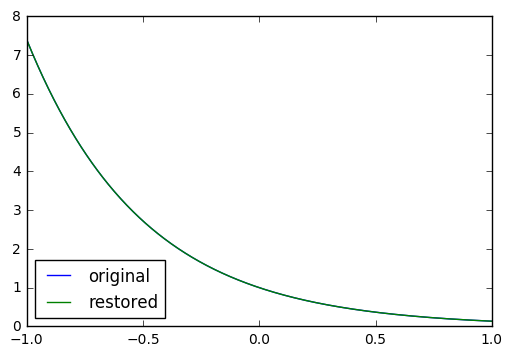

In [1]:
import numpy as np
import math
import random
from numpy.polynomial import Chebyshev as T
import matplotlib.pyplot as plt
%matplotlib inline
# init
n = 601
m = 10

x = np.zeros(n, dtype=float)
y = np.zeros(n, dtype=float)
x_t = np.zeros(m, dtype=float)
y_t = np.zeros(m, dtype=float)
T_t = np.zeros((m, m) ,dtype=float)
y_tl = np.zeros(n, dtype=float)

x = np.linspace(-1, 1, n)

# function 
y = (np.exp(-2 * x))
   

i = 0
#x_t = x[:42:]
while i < m:
    point = i*60
    x_t[i] = x[point]
    y_t[i] = y[point]
    j = 0
    while j < m:
        T_t[i][j] = T.basis(j)(x_t[i])
        j = j + 1
    i = i + 1


C = np.linalg.solve(T_t, y_t)
#print ('Coefficients=', C)

i = 0
while i < n:
    j = 0
    summ = 0.0
    while j < m:
        summ = summ + C[j]*T.basis(j)(x[i])
        j = j + 1
    y_tl[i] = summ
    i = i + 1

plt.plot(x, y)    
plt.plot(x, y_tl)
plt.legend(['original', 'restored'], loc='lower left')
#plt.show()    

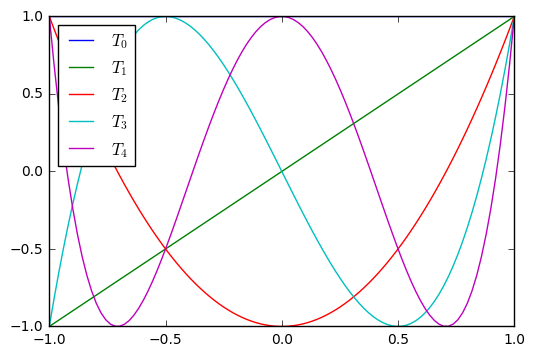

In [27]:
import numpy
import matplotlib.pyplot as plt
from numpy.polynomial import Chebyshev as T
x = numpy.linspace(-1, 1, 100)
for i in range(5): ax = plt.plot(x, T.basis(i)(x), lw=1, label="$T_%d$"%i)
plt.legend(loc="upper left")

plt.show()